# Load Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install -U imbalanced-learn
!pip install -U scikit-learn
!pip install costcla

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from imblearn.under_sampling import (
    RandomUnderSampler,
    CondensedNearestNeighbour,
    TomekLinks,
    OneSidedSelection,
    EditedNearestNeighbours,
    RepeatedEditedNearestNeighbours,
    AllKNN,
    NeighbourhoodCleaningRule,
    NearMiss,
    InstanceHardnessThreshold,
)
from imblearn.datasets import fetch_datasets
from imblearn.over_sampling import (
    RandomOverSampler,
    SMOTE,
    ADASYN,
    BorderlineSMOTE,
    SVMSMOTE,
)
from imblearn.combine import SMOTEENN, SMOTETomek

from imblearn.ensemble import (
    BalancedBaggingClassifier,
    BalancedRandomForestClassifier,
    RUSBoostClassifier,
    EasyEnsembleClassifier,
)

from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
)

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.7/dist-packages (0.8.0)
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.2)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/My Drive/Online Course/Imbalanced Datasets')
!pwd

/content/drive/My Drive/Online Course/Imbalanced Datasets


# Undersampling

0    983
1     17
dtype: int64


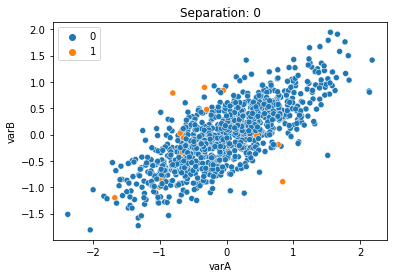

0    983
1     17
dtype: int64


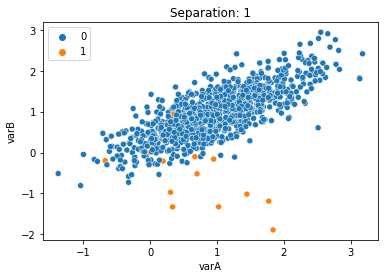

0    983
1     17
dtype: int64


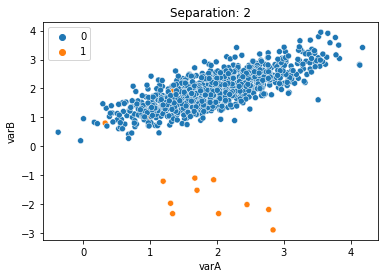

In [ ]:
def make_data(sep):
    
    # returns arrays
    X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.99],
                           class_sep=sep,# how separate the classes are
                           random_state=1)
    
    # trasform arrays into pandas df and series
    X = pd.DataFrame(X, columns =['varA', 'varB'])
    y = pd.Series(y)
    
    return X, y

# make datasets with different class separateness
# and plot

for sep in [0, 1, 2]:
    
    X, y = make_data(sep)
    
    print(y.value_counts())
    
    sns.scatterplot(
        data=X, x="varA", y="varB", hue=y
    )
    
    plt.title('Separation: {}'.format(sep))
    plt.show()

## Random

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


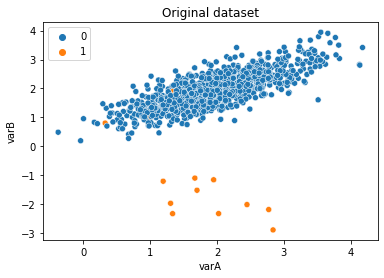

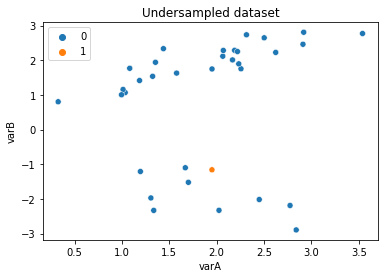

In [ ]:
# create data

X, y = make_data(sep=2)

# set up the random undersampling class

rus = RandomUnderSampler(
    sampling_strategy='auto',  # samples only the majority class
    random_state=0,  # for reproducibility
    replacement=True # if it should resample with replacement
)  

X_resampled, y_resampled = rus.fit_resample(X, y)
X_resampled = pd.DataFrame(X_resampled, columns =['varA', 'varB'])
y_resampled = pd.Series(y)

# plot of original data

sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)

plt.title('Original dataset')
plt.show()

# plot undersampled data

sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y_resampled
)

plt.title('Undersampled dataset')
plt.show()

## Condensed Nearest Neighbour

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

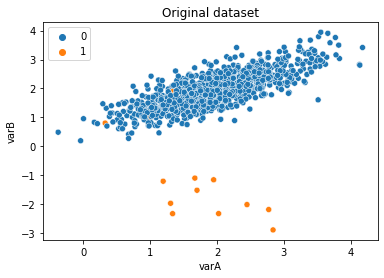

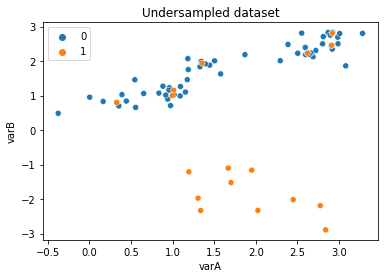

In [ ]:
# create data

X, y = make_data(sep=2)

# set up condensed nearest neighbour transformer

cnn = CondensedNearestNeighbour(
    sampling_strategy='auto',  # undersamples only the majority class
    random_state=0,  # for reproducibility
    n_neighbors=1,# default
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = cnn.fit_resample(X, y)
X_resampled = pd.DataFrame(X_resampled, columns =['varA', 'varB'])
y_resampled = pd.Series(y_resampled)

# plot of original data

sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)

plt.title('Original dataset')
plt.show()

# plot undersampled data

sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y_resampled
)

plt.title('Undersampled dataset')
plt.show()

## Tomek Links

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


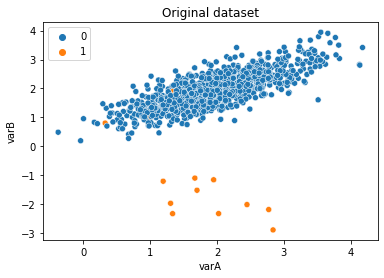

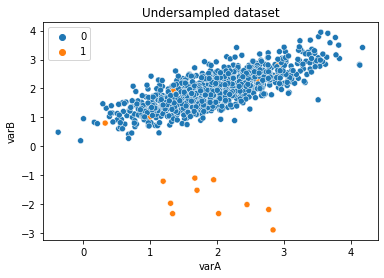

In [ ]:
# create data

X, y = make_data(sep=2)

# set up Tomek Links

tl = TomekLinks(
    sampling_strategy='auto',  # undersamples only the majority class
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = tl.fit_resample(X, y)

X_resampled = pd.DataFrame(X_resampled, columns =['varA', 'varB'])
y_resampled = pd.Series(y_resampled)

# plot of original data

sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)

plt.title('Original dataset')
plt.show()

# plot undersampled data

sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y_resampled
)

plt.title('Undersampled dataset')
plt.show()


## One Sided Selection

In [ ]:
# create data

X, y = make_data(sep=2)

# set up OSS

oss = OneSidedSelection(
    sampling_strategy='auto',  # undersamples only the majority class
    random_state=0,  # for reproducibility
    n_neighbors=1,# default
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = oss.fit_resample(X, y)

X_resampled = pd.DataFrame(X_resampled, columns =['varA', 'varB'])
y_resampled = pd.Series(y_resampled)

# plot of original data

sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)

plt.title('Original dataset')
plt.show()

# plot undersampled data

sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y_resampled
)

plt.title('Undersampled dataset')
plt.show()

## Edited Nearest Neighbour

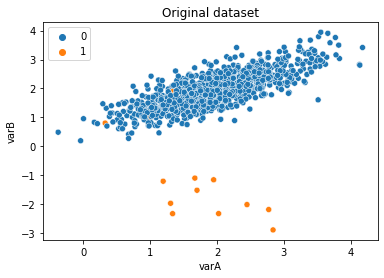

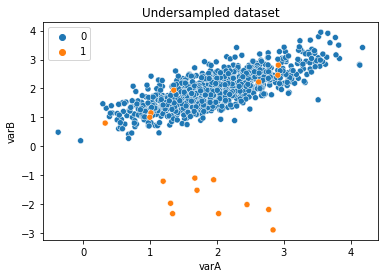

In [ ]:
# create data

X, y = make_data(sep=2)

# set up edited nearest neighbour

enn = EditedNearestNeighbours(
    sampling_strategy='auto',  # undersamples only the majority class
    n_neighbors=3,
    kind_sel='all',  # all neighbours need to have the same label as the observation examined
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = enn.fit_resample(X, y)

X_resampled = pd.DataFrame(X_resampled, columns =['varA', 'varB'])
y_resampled = pd.Series(y_resampled)

# plot of original data

sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)

plt.title('Original dataset')
plt.show()

# plot undersampled data

sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y_resampled
)

plt.title('Undersampled dataset')
plt.show()

## Repeated Edited Nearest Neighbour

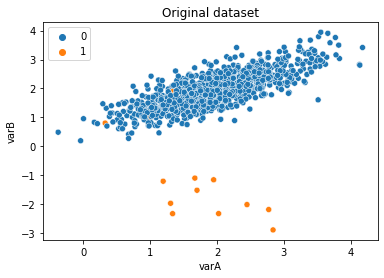

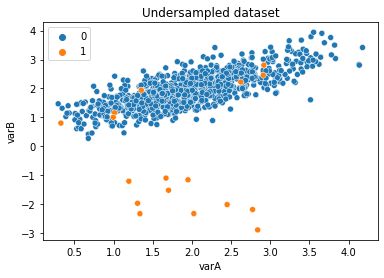

In [ ]:
# create data

X, y = make_data(sep=2)

# set up repeated edited nearest neighbour

renn = RepeatedEditedNearestNeighbours(
    sampling_strategy='auto',# removes only the majority class
    n_neighbors=3, # 3 KNN
    kind_sel='all', # all neighbouring observations should show the same class
    n_jobs=4, # 4 processors in my laptop
    max_iter=100) # maximum number of iterations

X_resampled, y_resampled = renn.fit_resample(X, y)

X_resampled = pd.DataFrame(X_resampled, columns =['varA', 'varB'])
y_resampled = pd.Series(y_resampled)

# plot of original data

sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)

plt.title('Original dataset')
plt.show()

# plot undersampled data

sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y_resampled
)

plt.title('Undersampled dataset')
plt.show()

## All KNN

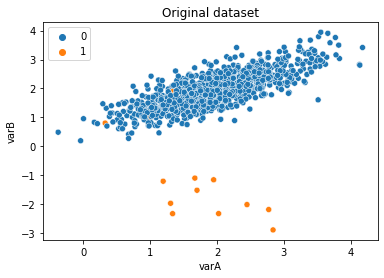

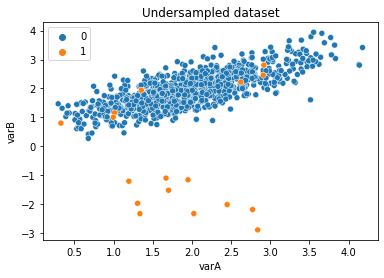

In [ ]:
# create data

X, y = make_data(sep=2)

# set up All KNN

allknn = AllKNN(
    sampling_strategy='auto',  # undersamples only the majority class
    n_neighbors=3,
    kind_sel='all',  # all neighbours need to have the same label as the observation examined
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = allknn.fit_resample(X, y)

X_resampled = pd.DataFrame(X_resampled, columns =['varA', 'varB'])
y_resampled = pd.Series(y_resampled)

# plot of original data

sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)

plt.title('Original dataset')
plt.show()

# plot undersampled data

sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y_resampled
)

plt.title('Undersampled dataset')
plt.show()

## Neighbourhood Cleaning Rule

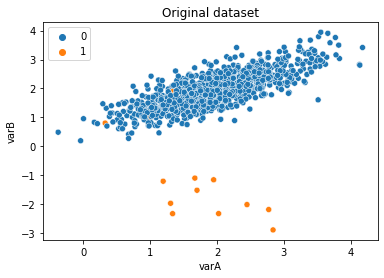

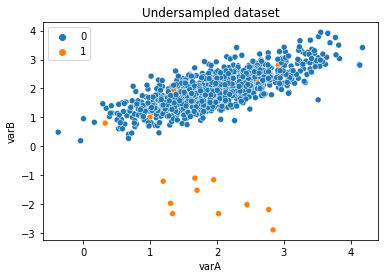

In [ ]:
# create data

X, y = make_data(sep=2)

# set up Neighbourhood cleaning rule

ncr = NeighbourhoodCleaningRule(
    sampling_strategy='auto',# removes only the majority class
    n_neighbors=3, # 3 KNN
    kind_sel='all', # all neighbouring observations should show the same class
    n_jobs=4, # 4 processors in my laptop
    threshold_cleaning=0.5) # threshold no exclude or not observations 

X_resampled, y_resampled = ncr.fit_resample(X, y)

X_resampled = pd.DataFrame(X_resampled, columns =['varA', 'varB'])
y_resampled = pd.Series(y_resampled)

# plot of original data

sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)

plt.title('Original dataset')
plt.show()

# plot undersampled data

sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y_resampled
)

plt.title('Undersampled dataset')
plt.show()

## NearMiss

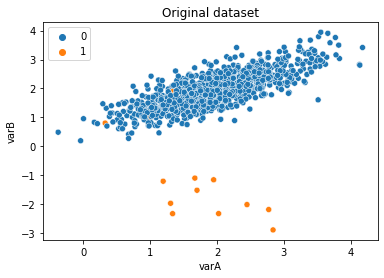

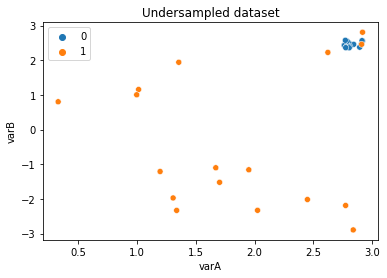

In [ ]:
# create data

X, y = make_data(sep=2)

# set up Near Miss, first method
# that is, version = 1

nm1 = NearMiss(
    sampling_strategy='auto',  # undersamples only the majority class
    version=1,
    n_neighbors=3,
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = nm1.fit_resample(X, y)

X_resampled = pd.DataFrame(X_resampled, columns =['varA', 'varB'])
y_resampled = pd.Series(y_resampled)

# plot of original data

sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)

plt.title('Original dataset')
plt.show()

# plot undersampled data

sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y_resampled
)

plt.title('Undersampled dataset')
plt.show()

## Instance Hardness Class

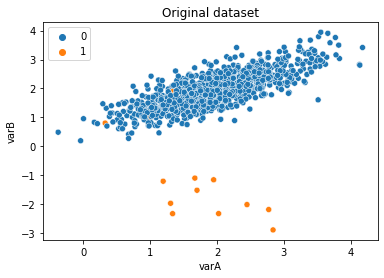

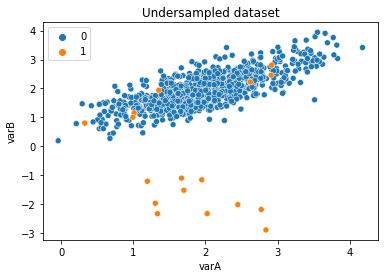

In [ ]:
# create data

X, y = make_data(sep=2)

# set up the instance hardness threshold

iht = InstanceHardnessThreshold(
    # select a classifier, in this case Random Forests
    estimator=RandomForestClassifier(n_estimators=100, random_state=0),
    
    sampling_strategy='auto',  # undersamples only the majority class
    random_state=0,
    n_jobs=4, # have 4 processors in my laptop
    cv=3)  # cross validation fold

X_resampled, y_resampled = iht.fit_resample(X, y)

X_resampled = pd.DataFrame(X_resampled, columns =['varA', 'varB'])
y_resampled = pd.Series(y_resampled)

# plot of original data

sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)

plt.title('Original dataset')
plt.show()

# plot undersampled data

sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y_resampled
)

plt.title('Undersampled dataset')
plt.show()

## Comparison

In [ ]:
undersampler_dict = {

    'random': RandomUnderSampler(
        sampling_strategy='auto',
        random_state=0,
        replacement=False),

    'cnn': CondensedNearestNeighbour(
        sampling_strategy='auto',
        random_state=0,
        n_neighbors=1,
        n_jobs=4),

    'tomek': TomekLinks(
        sampling_strategy='auto',
        n_jobs=4),

    'oss': OneSidedSelection(
        sampling_strategy='auto',
        random_state=0,
        n_neighbors=1,
        n_jobs=4),

    'enn': EditedNearestNeighbours(
        sampling_strategy='auto',
        n_neighbors=3,
        kind_sel='all',
        n_jobs=4),

    'renn': RepeatedEditedNearestNeighbours(
        sampling_strategy='auto',
        n_neighbors=3,
        kind_sel='all',
        n_jobs=4,
        max_iter=100),

    'allknn': AllKNN(
        sampling_strategy='auto',
        n_neighbors=3,
        kind_sel='all',
        n_jobs=4),

    'ncr': NeighbourhoodCleaningRule(
        sampling_strategy='auto',
        n_neighbors=3,
        kind_sel='all',
        n_jobs=4,
        threshold_cleaning=0.5),

    'nm1': NearMiss(
        sampling_strategy='auto',
        version=1,
        n_neighbors=3,
        n_jobs=4),

    'nm2': NearMiss(
        sampling_strategy='auto',
        version=2,
        n_neighbors=3,
        n_jobs=4),

    'iht': InstanceHardnessThreshold(
        estimator=LogisticRegression(random_state=0),
        sampling_strategy='auto',
        random_state=0,
        n_jobs=4,
        cv=3)
}

In [ ]:
datasets_ls = [
    'car_eval_34',
    'ecoli',
    'thyroid_sick',
    'arrhythmia',
    'ozone_level'
]

# print class imbalance

for dataset in datasets_ls:
    data = fetch_datasets()[dataset]
    print(dataset)
    print(Counter(data.target))
    print()

# function to train random forests and evaluate the performance

def run_randomForests(X_train, X_test, y_train, y_test):

    rf = RandomForestClassifier(
        n_estimators=100, random_state=39, max_depth=3, n_jobs=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = rf.predict_proba(X_test)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

    return roc_auc_score(y_test, pred[:, 1])

    # to save the results
results_dict = {}
shapes_dict = {}

for dataset in datasets_ls:
    
    results_dict[dataset] = {}
    shapes_dict[dataset] = {}
    
    print(dataset)
    
    # load dataset
    data = fetch_datasets()[dataset]
    
    # separate train and test
    X_train, X_test, y_train, y_test = train_test_split(
    data.data,  
    data.target, 
    test_size=0.3,
    random_state=0)
    
    # as many undersampling techniques use KNN
    # we set variables in the same scale
    scaler = MinMaxScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
        
    roc = run_randomForests(X_train, X_test, y_train, y_test)
    
    # store results
    results_dict[dataset]['full_data'] = roc
    shapes_dict[dataset]['full_data'] = len(X_train)
    
    print()
    
    for undersampler in undersampler_dict.keys():
        
        print(undersampler)
        
        # resample
        X_resampled, y_resampled = undersampler_dict[undersampler].fit_resample(X_train, y_train)
        
        # evaluate performance
        roc = run_randomForests(X_resampled, X_test, y_resampled, y_test)
        
        #store results
        results_dict[dataset][undersampler] = roc
        shapes_dict[dataset][undersampler] = len(X_resampled)
        print()
        
    print()
        

car_eval_34
Counter({-1: 1594, 1: 134})

ecoli
Counter({-1: 301, 1: 35})

thyroid_sick
Counter({-1: 3541, 1: 231})

arrhythmia
Counter({-1: 427, 1: 25})

ozone_level
Counter({-1: 2463, 1: 73})

car_eval_34
Train set
Random Forests roc-auc: 0.9765820711450264
Test set
Random Forests roc-auc: 0.9682620675579141

random
Train set
Random Forests roc-auc: 0.9963001503063939
Test set
Random Forests roc-auc: 0.9897438514134096

cnn
Train set
Random Forests roc-auc: 0.9682002467830072
Test set
Random Forests roc-auc: 0.986376160832738

tomek
Train set
Random Forests roc-auc: 0.980435542098521
Test set
Random Forests roc-auc: 0.973288090621492

oss
Train set
Random Forests roc-auc: 0.9788177918796639
Test set
Random Forests roc-auc: 0.9683130931727727

enn
Train set
Random Forests roc-auc: 0.9864826470845354
Test set
Random Forests roc-auc: 0.9644351464435147

renn
Train set
Random Forests roc-auc: 0.9958987301837685
Test set
Random Forests roc-auc: 0.9692315542402286

allknn
Train set
Random F

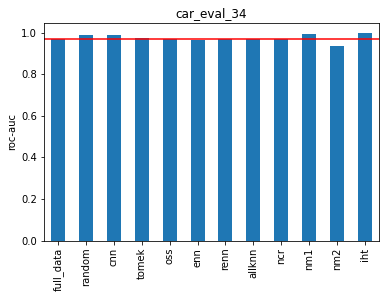

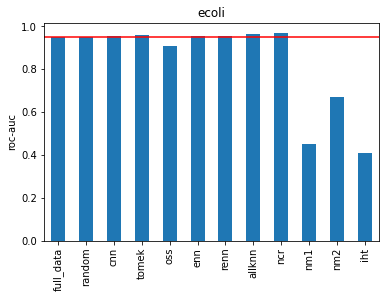

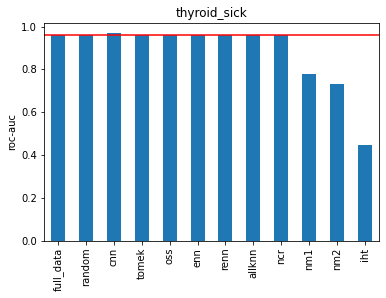

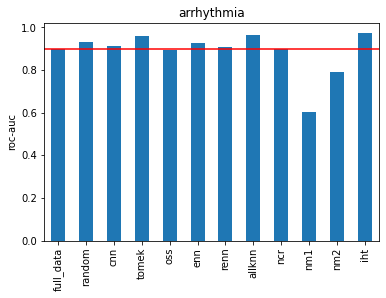

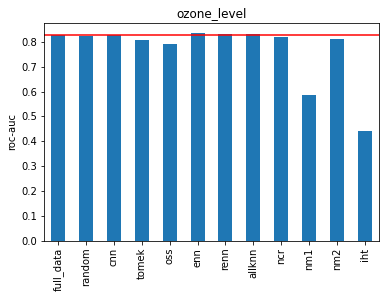

**Different under-sampling techniques work best for different datasets.**


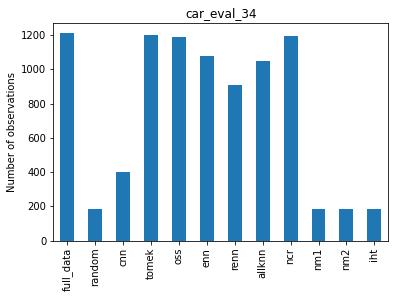

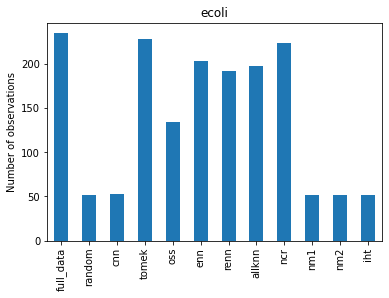

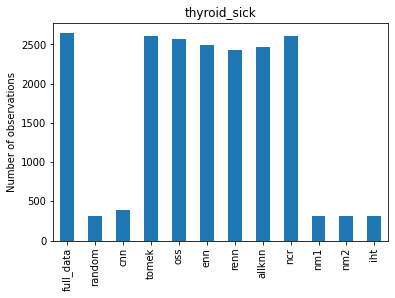

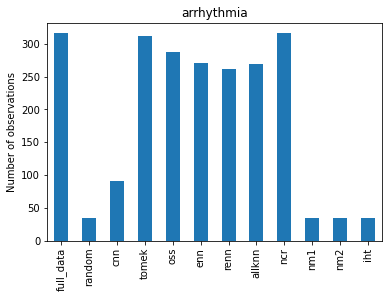

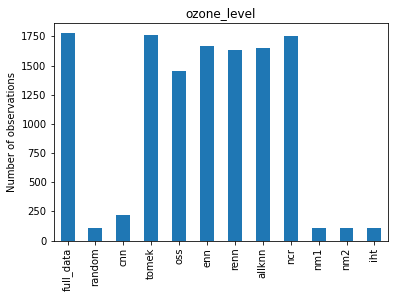

In [ ]:
for dataset in datasets_ls:
    
    pd.Series(results_dict[dataset]).plot.bar()
    plt.title(dataset)
    plt.ylabel('roc-auc')
#     plt.ylim(0.55, 0.9)
    plt.axhline(results_dict[dataset]['full_data'], color='r')
    plt.show()

print("**Different under-sampling techniques work best for different datasets.**")
for dataset in datasets_ls:
    
    pd.Series(shapes_dict[dataset]).plot.bar()
    plt.title(dataset)
    plt.ylabel('Number of observations')
    plt.show()

# Oversampling

In [ ]:
oversampler_dict = {

    'random': RandomOverSampler(
        sampling_strategy='auto',
        random_state=0),

    'smote': SMOTE(
        sampling_strategy='auto',  # samples only the minority class
        random_state=0,  # for reproducibility
        k_neighbors=5,
        n_jobs=4),

    'adasyn': ADASYN(
        sampling_strategy='auto',  # samples only the minority class
        random_state=0,  # for reproducibility
        n_neighbors=5,
        n_jobs=4),

    'border1': BorderlineSMOTE(
        sampling_strategy='auto',  # samples only the minority class
        random_state=0,  # for reproducibility
        k_neighbors=5,
        m_neighbors=10,
        kind='borderline-1',
        n_jobs=4),

    'border2': BorderlineSMOTE(
        sampling_strategy='auto',  # samples only the minority class
        random_state=0,  # for reproducibility
        k_neighbors=5,
        m_neighbors=10,
        kind='borderline-2',
        n_jobs=4),

    'svm': SVMSMOTE(
        sampling_strategy='auto',  # samples only the minority class
        random_state=0,  # for reproducibility
        k_neighbors=5,
        m_neighbors=10,
        n_jobs=4,
        svm_estimator=SVC(kernel='linear')),
}

In [ ]:
datasets_ls = [
    'car_eval_34',
    'ecoli',
    'thyroid_sick',
    'arrhythmia',
    'ozone_level'
]

# print class imbalance

for dataset in datasets_ls:
    data = fetch_datasets()[dataset]
    print(dataset)
    print(Counter(data.target))
    print()

# function to train random forests and evaluate the performance

def run_randomForests(X_train, X_test, y_train, y_test):

    rf = RandomForestClassifier(
        n_estimators=100, random_state=39, max_depth=2, n_jobs=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = rf.predict_proba(X_test)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

    return roc_auc_score(y_test, pred[:, 1])

# to save the results
results_dict = {}
shapes_dict = {}

for dataset in datasets_ls:
    
    results_dict[dataset] = {}
    shapes_dict[dataset] = {}
    
    print(dataset)
    
    # load dataset
    data = fetch_datasets()[dataset]
    
    # separate train and test
    X_train, X_test, y_train, y_test = train_test_split(
    data.data,  
    data.target, 
    test_size=0.3,
    random_state=0)
    
    # as some oversampling techniques use KNN
    # we set variables in the same scale
    scaler = MinMaxScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
        
    roc = run_randomForests(X_train, X_test, y_train, y_test)
    
    # store results
    results_dict[dataset]['full_data'] = roc
    shapes_dict[dataset]['full_data'] = len(X_train)
    
    print()
    
    for oversampler in oversampler_dict.keys():
        
        print(oversampler)
        
        # resample
        X_resampled, y_resampled = oversampler_dict[oversampler].fit_resample(X_train, y_train)
        
        # evaluate performance
        roc = run_randomForests(X_resampled, X_test, y_resampled, y_test)
        
        #store results
        results_dict[dataset][oversampler] = roc
        shapes_dict[dataset][oversampler] = len(X_resampled)
        print()
        
    print()
            

car_eval_34
Counter({-1: 1594, 1: 134})

ecoli
Counter({-1: 301, 1: 35})

thyroid_sick
Counter({-1: 3541, 1: 231})

arrhythmia
Counter({-1: 427, 1: 25})

ozone_level
Counter({-1: 2463, 1: 73})

car_eval_34
Train set
Random Forests roc-auc: 0.9581261802905924
Test set
Random Forests roc-auc: 0.9440504133074803

random
Train set
Random Forests roc-auc: 0.9867662928276872
Test set
Random Forests roc-auc: 0.9847688539646903

smote
Train set
Random Forests roc-auc: 0.9898270191801236
Test set
Random Forests roc-auc: 0.9777018063067661

adasyn
Train set
Random Forests roc-auc: 0.9895635910626338
Test set
Random Forests roc-auc: 0.9845392386978264

border1
Train set
Random Forests roc-auc: 0.9889084801068846
Test set
Random Forests roc-auc: 0.9839524441269516

border2
Train set
Random Forests roc-auc: 0.9906154854125718
Test set
Random Forests roc-auc: 0.9855342381875702

svm
Train set
Random Forests roc-auc: 0.9868208913040686
Test set
Random Forests roc-auc: 0.9754056536381264


ecoli
Train

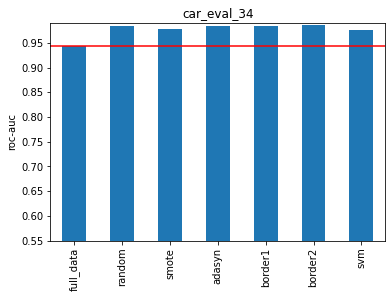

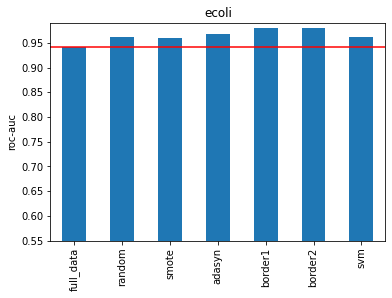

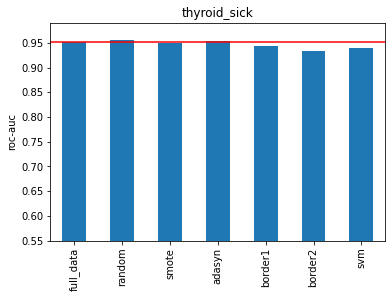

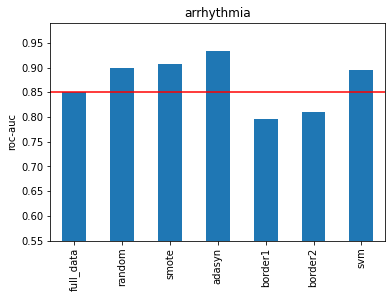

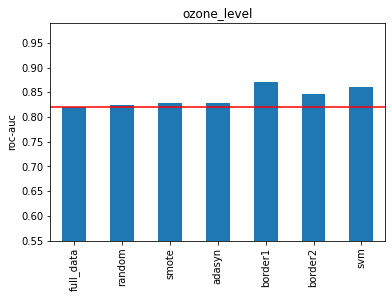

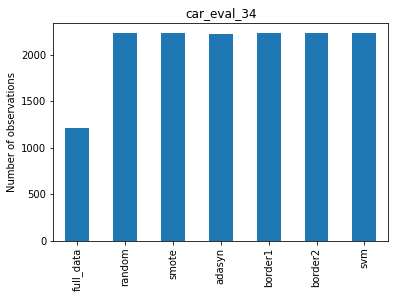

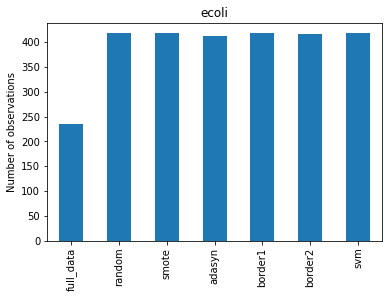

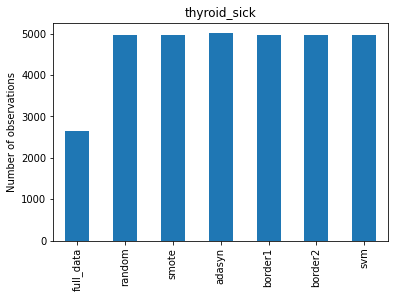

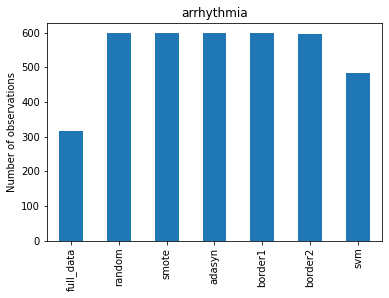

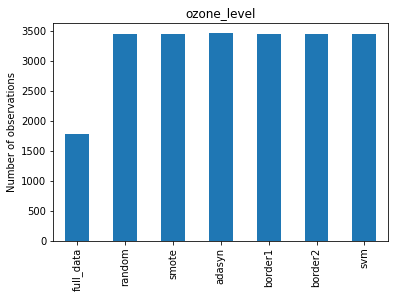

In [ ]:
for dataset in datasets_ls:
    
    pd.Series(results_dict[dataset]).plot.bar()
    plt.title(dataset)
    plt.ylabel('roc-auc')
    plt.ylim(0.55, 0.99)
    plt.axhline(results_dict[dataset]['full_data'], color='r')
    plt.show()

for dataset in datasets_ls:
    
    pd.Series(shapes_dict[dataset]).plot.bar()
    plt.title(dataset)
    plt.ylabel('Number of observations')
    plt.show()

# Over and Undersampling

In [ ]:
oversampler_dict = {

    'smote': SMOTE(
        sampling_strategy='auto',
        random_state=0,
        k_neighbors=5,
        n_jobs=4),

    'border1': BorderlineSMOTE(
        sampling_strategy='auto',
        random_state=0,
        k_neighbors=5,
        m_neighbors=10,
        kind='borderline-1',
        n_jobs=4),

    'svm': SVMSMOTE(
        sampling_strategy='auto',
        random_state=0,
        k_neighbors=5,
        m_neighbors=10,
        n_jobs=4,
        svm_estimator=SVC(kernel='linear')),

    'smenn': SMOTEENN(
        sampling_strategy='auto',
        random_state=0,
        smote=SMOTE(sampling_strategy='auto', random_state=0, k_neighbors=5),
        enn=EditedNearestNeighbours(
            sampling_strategy='auto', n_neighbors=3, kind_sel='all'),
        n_jobs=4),

    'smtomek': SMOTETomek(
        sampling_strategy='auto',
        random_state=0,
        smote=SMOTE(sampling_strategy='auto', random_state=0, k_neighbors=5),
        tomek=TomekLinks(sampling_strategy='all'),
        n_jobs=4),

}

In [ ]:
datasets_ls = [
    'car_eval_34',
    'ecoli',
    'thyroid_sick',
    'arrhythmia',
    'ozone_level'
]

# print class imbalance

for dataset in datasets_ls:
    data = fetch_datasets()[dataset]
    print(dataset)
    print(Counter(data.target))
    print()

# function to train random forests and evaluate the performance

def run_randomForests(X_train, X_test, y_train, y_test):

    rf = RandomForestClassifier(
        n_estimators=100, random_state=39, max_depth=2, n_jobs=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = rf.predict_proba(X_test)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

    return roc_auc_score(y_test, pred[:, 1])

# to save the results
results_dict = {}
shapes_dict = {}

for dataset in datasets_ls:
    
    results_dict[dataset] = {}
    shapes_dict[dataset] = {}
    
    print(dataset)
    
    # load dataset
    data = fetch_datasets()[dataset]
    
    # separate train and test
    X_train, X_test, y_train, y_test = train_test_split(
    data.data,  
    data.target, 
    test_size=0.3,
    random_state=0)
    
    # as some oversampling techniques use KNN
    # we set variables in the same scale
    scaler = MinMaxScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
        
    roc = run_randomForests(X_train, X_test, y_train, y_test)
    
    # store results
    results_dict[dataset]['full_data'] = roc
    shapes_dict[dataset]['full_data'] = len(X_train)
    
    print()
    
    for oversampler in oversampler_dict.keys():
        
        print(oversampler)
        
        # resample
        X_resampled, y_resampled = oversampler_dict[oversampler].fit_resample(X_train, y_train)
        
        # evaluate performance
        roc = run_randomForests(X_resampled, X_test, y_resampled, y_test)
        
        #store results
        results_dict[dataset][oversampler] = roc
        shapes_dict[dataset][oversampler] = len(X_resampled)
        print()
        
    print()
        

car_eval_34
Counter({-1: 1594, 1: 134})

ecoli
Counter({-1: 301, 1: 35})

thyroid_sick
Counter({-1: 3541, 1: 231})

arrhythmia
Counter({-1: 427, 1: 25})

ozone_level
Counter({-1: 2463, 1: 73})

car_eval_34
Train set
Random Forests roc-auc: 0.9581261802905924
Test set
Random Forests roc-auc: 0.9440504133074803

smote
Train set
Random Forests roc-auc: 0.9898270191801236
Test set
Random Forests roc-auc: 0.9777018063067661

border1
Train set
Random Forests roc-auc: 0.9889084801068846
Test set
Random Forests roc-auc: 0.9839524441269516

svm
Train set
Random Forests roc-auc: 0.9868208913040686
Test set
Random Forests roc-auc: 0.9754056536381264

smenn
Train set
Random Forests roc-auc: 0.9885568016854871
Test set
Random Forests roc-auc: 0.9751505255638331

smtomek
Train set
Random Forests roc-auc: 0.9898270191801236
Test set
Random Forests roc-auc: 0.9777018063067661


ecoli
Train set
Random Forests roc-auc: 0.9716599190283401
Test set
Random Forests roc-auc: 0.9408212560386474

smote
Train s

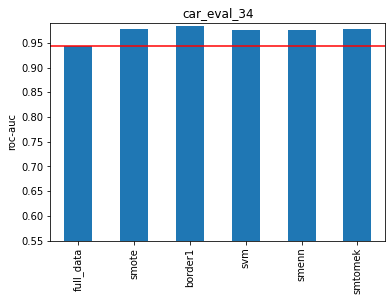

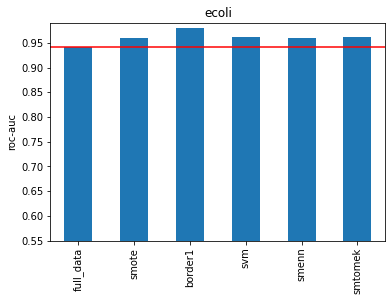

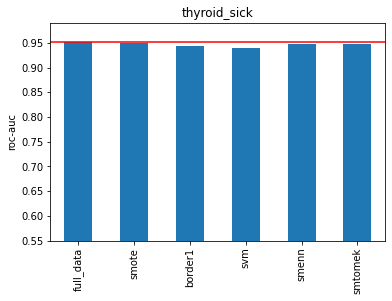

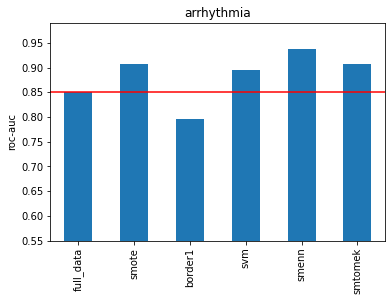

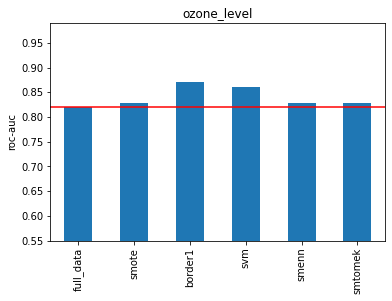

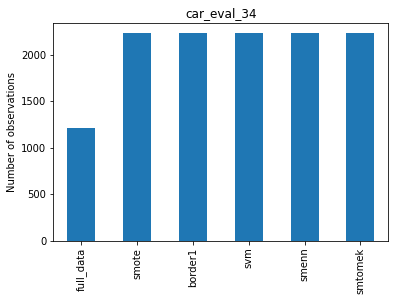

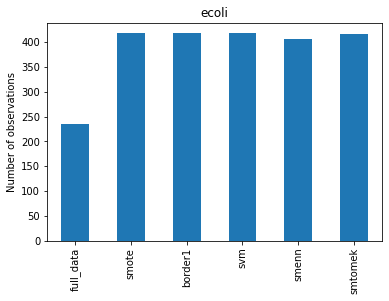

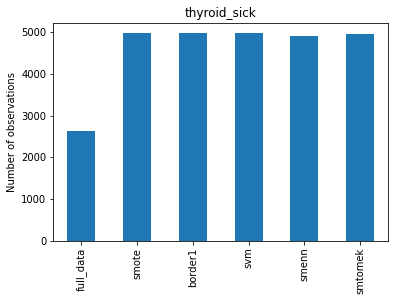

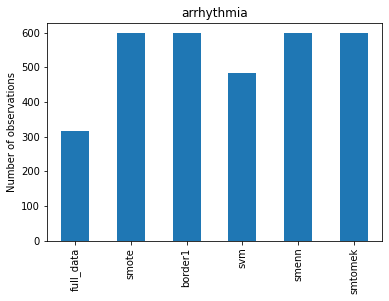

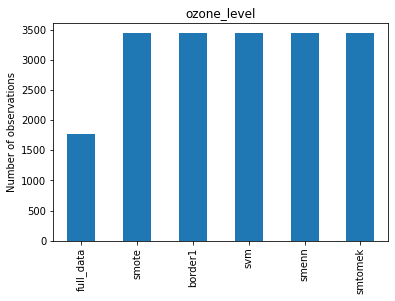

In [ ]:
for dataset in datasets_ls:
    
    pd.Series(results_dict[dataset]).plot.bar()
    plt.title(dataset)
    plt.ylabel('roc-auc')
    plt.ylim(0.55, 0.99)
    plt.axhline(results_dict[dataset]['full_data'], color='r')
    plt.show()

for dataset in datasets_ls:
    
    pd.Series(shapes_dict[dataset]).plot.bar()
    plt.title(dataset)
    plt.ylabel('Number of observations')
    plt.show()

# Ensemble Learning

In [ ]:
# just re-sampling methods (no classifier)

resampling_dict = {
    
    'random': RandomUnderSampler(
        sampling_strategy='auto',
        random_state=0,
        replacement=False,
    ),

    'smote': SMOTE(
        sampling_strategy='auto',
        random_state=0,
        k_neighbors=5,
        n_jobs=4,
    ),
}

# ensemble methods (with or without resampling)

ensemble_dict = {

    # balanced random forests (bagging)
    'balancedRF': BalancedRandomForestClassifier(
        n_estimators=20,
        criterion='gini',
        max_depth=3,
        sampling_strategy='auto',
        n_jobs=4,
        random_state=2909,
    ),

    # bagging of Logistic regression, no resampling
    'bagging': BaggingClassifier(
        base_estimator=LogisticRegression(random_state=2909),
        n_estimators=20,
        n_jobs=4,
        random_state=2909,
    ),

    # bagging of Logistic regression, with resampling
    'balancedbagging': BalancedBaggingClassifier(
        base_estimator=LogisticRegression(random_state=2909),
        n_estimators=20,
        max_samples=1.0,  # The number of samples to draw from X to train each base estimator
        max_features=1.0,  # The number of features to draw from X to train each base estimator
        bootstrap=True,
        bootstrap_features=False,
        sampling_strategy='auto',
        n_jobs=4,
        random_state=2909,
    ),

    # boosting + undersampling
    'rusboost': RUSBoostClassifier(
        base_estimator=None,
        n_estimators=20,
        learning_rate=1.0,
        sampling_strategy='auto',
        random_state=2909,
    ),

    # bagging + boosting + under-sammpling
    'easyEnsemble': EasyEnsembleClassifier(
        n_estimators=20,
        sampling_strategy='auto',
        n_jobs=4,
        random_state=2909,
    ),
}

In [ ]:
datasets_ls = [
    'car_eval_34',
    'ecoli',
    'thyroid_sick',
    'arrhythmia',
    'ozone_level'
]

# function to train random forests and evaluate the performance

def run_randomForests(X_train, X_test, y_train, y_test):

    rf = RandomForestClassifier(
        n_estimators=20, random_state=39, max_depth=2, n_jobs=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = rf.predict_proba(X_test)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

    return roc_auc_score(y_test, pred[:, 1])

# function to train random forests and evaluate the peadaormance

def run_adaboost(X_train, X_test, y_train, y_test):

    ada = AdaBoostClassifier(n_estimators=20, random_state=2909)
    
    ada.fit(X_train, y_train)

    print('Train set')
    pred = ada.predict_proba(X_train)
    print(
        'AdaBoost roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = ada.predict_proba(X_test)
    print(
        'AdaBoost roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

    return roc_auc_score(y_test, pred[:, 1])

# function to train random forests and evaluate the peensembleormance

def run_ensemble(ensemble, X_train, X_test, y_train, y_test):
    
    ensemble.fit(X_train, y_train)

    print('Train set')
    pred = ensemble.predict_proba(X_train)
    print(
        'ensembleBoost roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = ensemble.predict_proba(X_test)
    print(
        'ensembleBoost roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

    return roc_auc_score(y_test, pred[:, 1])

# to save the results
results_dict = {}

for dataset in datasets_ls:
    
    results_dict[dataset] = {}    
    print(dataset)
    
    # load dataset
    data = fetch_datasets()[dataset]
    
    # separate train and test
    X_train, X_test, y_train, y_test = train_test_split(
    data.data,  
    data.target, 
    test_size=0.3,
    random_state=0)
    
    # we set variables in the same scale
    scaler = MinMaxScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # train model and store result
    roc = run_randomForests(X_train, X_test, y_train, y_test)
    results_dict[dataset]['full_data'] = roc
    print()
    
    # train model and store result
    roc = run_adaboost(X_train, X_test, y_train, y_test)
    results_dict[dataset]['full_data_adaboost'] = roc
    print()
    
    for sampler in resampling_dict.keys():
        
        print(sampler)
        
        # resample
        X_resampled, y_resampled = resampling_dict[sampler].fit_resample(X_train, y_train)
        
        # train model and store result
        roc = run_randomForests(X_resampled, X_test, y_resampled, y_test)
        results_dict[dataset][sampler] = roc
        print()
    
    for ensemble in ensemble_dict.keys():
        
        print(ensemble)
        
        # train model and store result
        roc = run_ensemble(ensemble_dict[ensemble], X_train, X_test, y_train, y_test)
        results_dict[dataset][ensemble] = roc
        print()
        

car_eval_34
Train set
Random Forests roc-auc: 0.9513383050063591
Test set
Random Forests roc-auc: 0.9351974691295031

Train set
AdaBoost roc-auc: 0.9987040891047134
Test set
AdaBoost roc-auc: 0.9961985916930298

random
Train set
Random Forests roc-auc: 0.9808648398658805
Test set
Random Forests roc-auc: 0.9641289927543627

smote
Train set
Random Forests roc-auc: 0.9781883101450393
Test set
Random Forests roc-auc: 0.9545872027757936

balancedRF
Train set
ensembleBoost roc-auc: 0.9919499364088333
Test set
ensembleBoost roc-auc: 0.9923971833860598

bagging
Train set
ensembleBoost roc-auc: 0.9987281766678229
Test set
ensembleBoost roc-auc: 0.9969894887233391

balancedbagging
Train set
ensembleBoost roc-auc: 0.9980440898755155
Test set
ensembleBoost roc-auc: 0.9962751301153179

rusboost
Train set
ensembleBoost roc-auc: 0.9975286160249739
Test set
ensembleBoost roc-auc: 0.9960455148484539

easyEnsemble
Train set
ensembleBoost roc-auc: 0.9983813157590472
Test set
ensembleBoost roc-auc: 0.9955

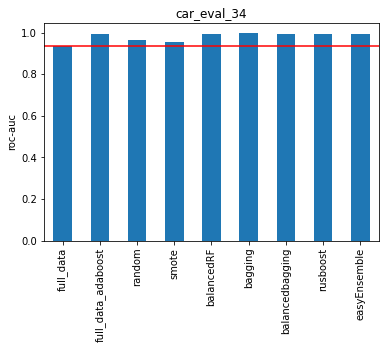

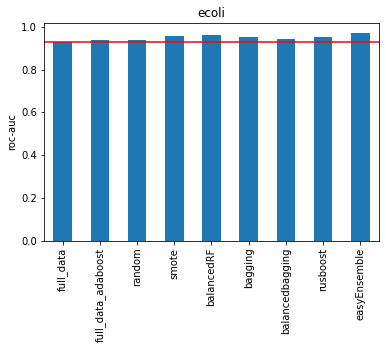

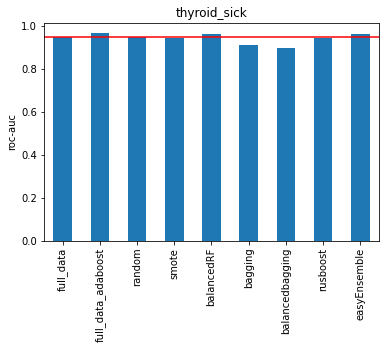

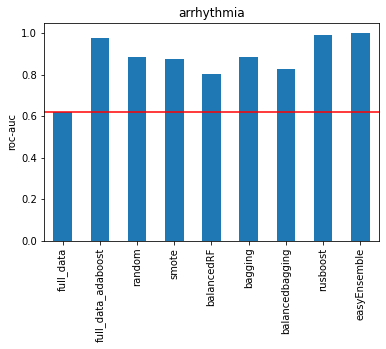

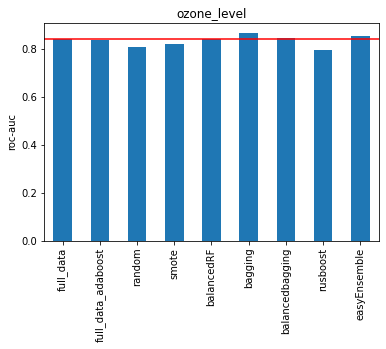

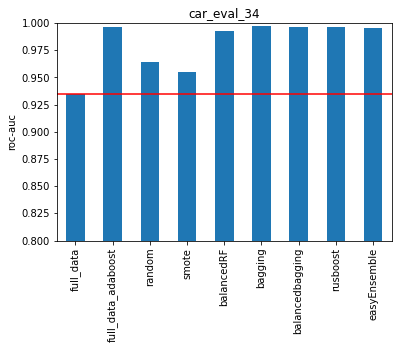

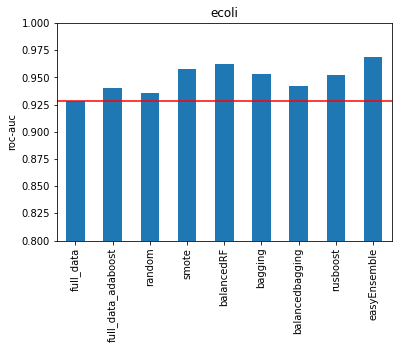

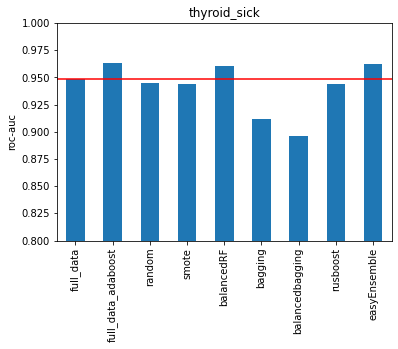

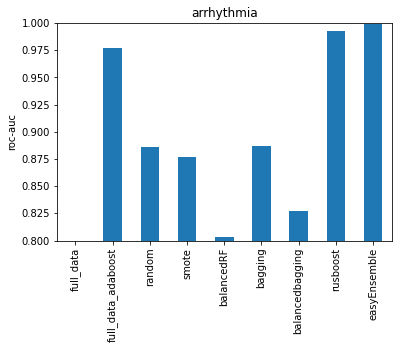

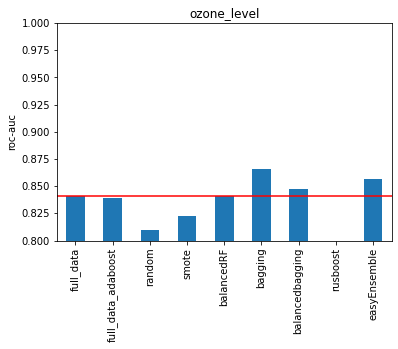

In [ ]:
for dataset in datasets_ls:
    
    pd.Series(results_dict[dataset]).plot.bar()
    plt.title(dataset)
    plt.ylabel('roc-auc')
    plt.axhline(results_dict[dataset]['full_data'], color='r')
    plt.show()

for dataset in datasets_ls:
    
    pd.Series(results_dict[dataset]).plot.bar()
    plt.title(dataset)
    plt.ylabel('roc-auc')
    plt.ylim(0.8, 1)
    plt.axhline(results_dict[dataset]['full_data'], color='r')
    plt.show()

# Cost-Sensitive Learning

## Cost when training ML model

In [ ]:
# load data
# only a few observations to speed the computaton

data = pd.read_csv('source_code/kdd2004.csv').sample(10000)

data.head()

# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # drop the target
    data['target'],  # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((7000, 74), (3000, 74))

In [ ]:
# Logistic Regression with class_weight

# we initialize the cost / weights when we set up the transformer

def run_Logit(X_train, X_test, y_train, y_test, class_weight):
    
    # weights introduced here
    logit = LogisticRegression(
        penalty='l2',
        solver='newton-cg',
        random_state=0,
        max_iter=10,
        n_jobs=4,
        class_weight=class_weight # weights / cost
    )
    
    logit.fit(X_train, y_train)

    print('Train set')
    pred = logit.predict_proba(X_train)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = logit.predict_proba(X_test)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))
    

## CLASS WEIGHT ##
# evaluate performance of algorithm built
# using imbalanced dataset

run_Logit(X_train,
          X_test,
          y_train,
          y_test,
          class_weight=None)

# evaluate performance of algorithm built
# cost estimated as imbalance ratio

# 'balanced' indicates that we want same amount of 
# each observation, thus, imbalance ratio

run_Logit(X_train,
          X_test,
          y_train,
          y_test,
          class_weight='balanced')

# evaluate performance of algorithm built
# cost estimated as imbalance ratio

# alternatively, we can pass a different cost
# in a dictionary, if we know it already

run_Logit(X_train,
          X_test,
          y_train,
          y_test,
          class_weight={-1:1, 1:10})

Train set
Random Forests roc-auc: 0.9311075812274368
Test set
Random Forests roc-auc: 0.9027470678715632
Train set
Random Forests roc-auc: 0.9887537906137184
Test set
Random Forests roc-auc: 0.9451547779273217
Train set
Random Forests roc-auc: 0.9849261131167268
Test set
Random Forests roc-auc: 0.9360099019419345


In [ ]:
# Logistic Regression + sample_weight

# we pass the weights / cost, when we train the algorithm

def run_Logit(X_train, X_test, y_train, y_test, sample_weight):
    
    logit = LogisticRegression(
        penalty='l2',
        solver='newton-cg',
        random_state=0,
        max_iter=10,
        n_jobs=4,
    )
    
    # costs are passed here
    logit.fit(X_train, y_train, sample_weight=sample_weight)

    print('Train set')
    pred = logit.predict_proba(X_train)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = logit.predict_proba(X_test)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))
    

# evaluate performance of algorithm built
# using imbalanced dataset

run_Logit(X_train,
          X_test,
          y_train,
          y_test,
          sample_weight=None)

# evaluate performance of algorithm built
# cost estimated as imbalance ratio

# with numpy.where, we introduce a cost of 99 to
# each observation of the minority class, and 1
# otherwise.

run_Logit(X_train,
          X_test,
          y_train,
          y_test,
          sample_weight=np.where(y_train==1,99,1))

Train set
Random Forests roc-auc: 0.9311075812274368
Test set
Random Forests roc-auc: 0.9027470678715632
Train set
Random Forests roc-auc: 0.9913761732851986
Test set
Random Forests roc-auc: 0.9552129398192656


## Cost with Cross Validation

In [ ]:
# load data
# only a few observations to speed the computaton

data = pd.read_csv('source_code/kdd2004.csv').sample(10000)

data.head()

# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # drop the target
    data['target'],  # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((7000, 74), (3000, 74))

In [ ]:
# set up initial random forest

rf = RandomForestClassifier(n_estimators=50,
                            random_state=39,
                            max_depth=2,
                            n_jobs=4,
                            class_weight=None)

# set up parameter search grid
# including class weight

param_grid = {
  'n_estimators': [10, 50, 100],
  'max_depth': [None, 2, 3],
  'class_weight': [None, {-1:1, 1:10}, {-1:1, 1:100}],
}

search = GridSearchCV(estimator=rf,
                      scoring='roc_auc',
                      param_grid=param_grid,
                      cv=2,
                     ).fit(X_train, y_train)

print(search.best_score_)
print(search.best_params_)
print(search.best_estimator_)
print(search.score(X_test, y_test))

0.9786454904542463
{'class_weight': {-1: 1, 1: 100}, 'max_depth': 2, 'n_estimators': 50}
RandomForestClassifier(class_weight={-1: 1, 1: 100}, max_depth=2,
                       n_estimators=50, n_jobs=4, random_state=39)
0.9803540506534115
